In [33]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
plt.style.use('ggplot')

## [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

In [20]:
# 载入 mnist
(x_train, _), (x_test, y_test) = mnist.load_data(path='/home/alan/文档/Paper/DATA/mnist.npz')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [5]:
autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, 
                epochs=100, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 0.3309 - val_loss: 0.2634
Epoch 2/100
60000/60000 [==============================] - 9s - loss: 0.2583 - val_loss: 0.2518
Epoch 3/100
60000/60000 [==============================] - 9s - loss: 0.2431 - val_loss: 0.2326
Epoch 4/100
60000/60000 [==============================] - 9s - loss: 0.2239 - val_loss: 0.2130
Epoch 5/100
60000/60000 [==============================] - 9s - loss: 0.2099 - val_loss: 0.2027
Epoch 6/100
60000/60000 [==============================] - 9s - loss: 0.1979 - val_loss: 0.1928
Epoch 7/100
60000/60000 [==============================] - 9s - loss: 0.1898 - val_loss: 0.1849
Epoch 8/100
60000/60000 [==============================] - 11s - loss: 0.1816 - val_loss: 0.1771
Epoch 9/100
60000/60000 [==============================] - 13s - loss: 0.1735 - val_loss: 0.1682
Epoch 10/100
60000/60000 [==============================] - 13s - loss: 0.1672 - val

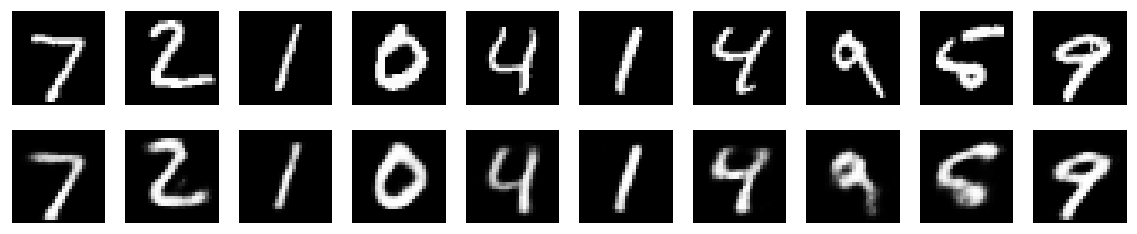

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 原始图像
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 重建的图像
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(autoencoder.predict(x_test)[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
autoencoder.predict(x_test)[0].reshape(28, 28)

array([[  2.27045930e-05,   7.34235499e-08,   8.32905755e-07,
          5.28513198e-08,   1.28687105e-09,   1.88047744e-10,
          4.46077699e-08,   4.84890677e-07,   3.66580744e-09,
          4.36044409e-08,   7.55619070e-08,   1.28957413e-06,
          6.14573814e-09,   1.06624380e-08,   4.67531845e-06,
          7.13055783e-08,   4.45302355e-08,   1.37449758e-08,
          4.85250986e-08,   4.62408116e-06,   1.64687023e-07,
          1.36636004e-06,   2.96489255e-09,   1.15267991e-08,
          2.01906482e-06,   2.49903991e-08,   6.50785736e-08,
          3.71472737e-07],
       [  9.77585457e-10,   4.25955626e-08,   2.76522019e-06,
          2.51803844e-09,   1.07412284e-08,   4.70220474e-10,
          1.79397432e-06,   6.72388478e-06,   3.85338899e-06,
          5.86310500e-10,   2.18543370e-08,   5.67596715e-07,
          1.46720055e-07,   3.42701334e-08,   1.13406271e-08,
          2.92770721e-07,   6.44631015e-08,   1.62094764e-08,
          7.86380667e-08,   1.40490911e-07,

In [9]:
encoder = Model(input_img, encoded)

In [10]:
encoded_imgs = encoder.predict(x_test)

In [11]:
encoded_imgs.shape

(10000, 32)

In [12]:
encoded_imgs[0]

array([ 10.11664104,   0.        ,   9.58017254,   0.        ,
         5.43717575,   7.3034153 ,   6.14766788,   5.93084478,
        16.01573181,   9.43446922,   6.04592228,  11.36015606,
        21.56978989,   0.        ,   0.        ,   5.54613924,
        14.33962727,   4.80764818,   9.90860176,  13.10477829,
         5.44173574,   5.84993982,   6.28608418,  11.33649063,
         7.95755482,  16.24573517,   8.172122  ,   0.        ,
        10.26253223,   5.99521732,   8.12468433,   9.06876087], dtype=float32)

In [13]:
scaled = scale(encoded_imgs)

/home/alan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/alan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [14]:
tsne = TSNE(n_components=2).fit(encoded_imgs)

In [16]:
tsne.embedding_.shape

(10000, 2)

In [17]:
embeded_imgs = tsne.embedding_

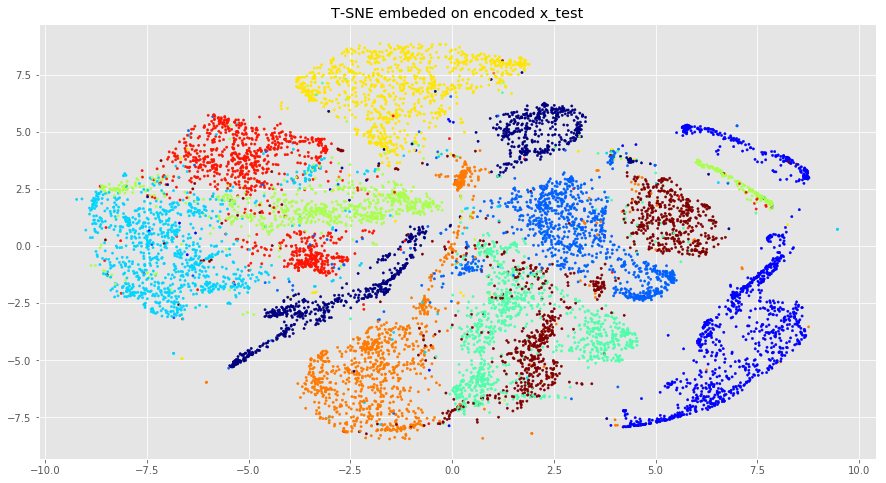

In [46]:
plt.figure(figsize=(15, 8))
plt.scatter(embeded_imgs[:, 0], embeded_imgs[:, 1], c=y_test, cmap='jet', s=5)
plt.title('T-SNE embeded on encoded x_test')

In [31]:
tsne_origin = TSNE(n_components=2).fit(scale(x_test))

/home/alan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/alan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


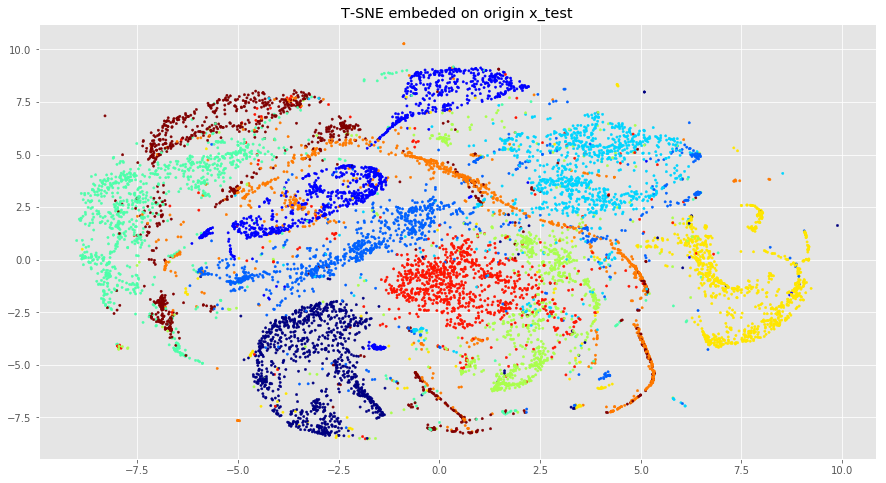

In [45]:
plt.figure(figsize=(15, 8))
plt.scatter(tsne_origin.embedding_[:, 0], tsne_origin.embedding_[:, 1], c=y_test, cmap='jet', s=5)
plt.title('T-SNE embeded on origin x_test')

In [34]:
pca_origin = PCA(n_components=2).fit(scale(x_test))

/home/alan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/alan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [38]:
x_test.shape

(10000, 784)

In [39]:
pca_origin.transform(x_test).shape

(10000, 2)

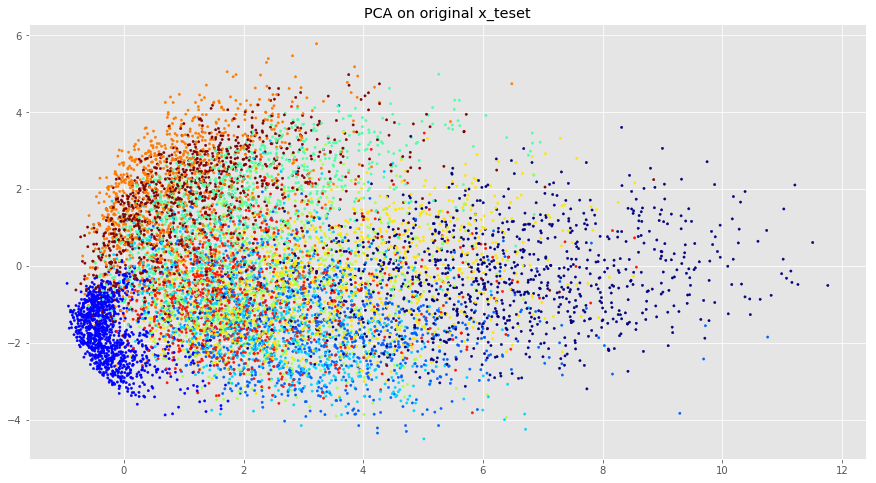

In [41]:
plt.figure(figsize=(15, 8))
plt.scatter(pca_origin.transform(x_test)[:, 0], pca_origin.transform(x_test)[:, 1], c=y_test, cmap='jet', s=5)
plt.title('PCA on original x_teset')